In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

In [41]:
df = pd.read_csv('cell_samples.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


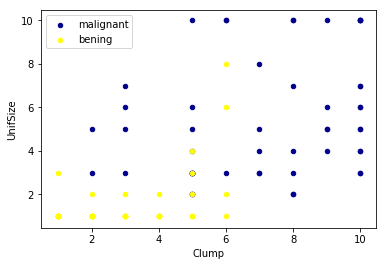

In [42]:
ax = df[df['Class'] == 4][0:50].plot(kind = 'scatter', x = 'Clump', y = 'UnifSize', color = 'DarkBlue', label = 'malignant');
df[df['Class']== 2][0:50].plot(kind= 'scatter', x = 'Clump', y= 'UnifSize', color ='Yellow', label = "bening", ax = ax)
plt.show()

In [43]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [44]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [45]:
f_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
x = np.asarray(f_df)
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [46]:
df['Class'] = df['Class'].astype('int')
y = np.asarray(df['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (478, 9) (478,)
Test set: (205, 9) (205,)


In [49]:
#with rbf
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)

/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [50]:
#with linear
clg = svm.SVC(kernel='linear')
clg.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [53]:
#with sigomoid
clh = svm.SVC(kernel='sigmoid')
clh.fit(x_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [57]:
y_pred_rbf = clf.predict(x_test)
y_pred_linear = clg.predict(x_test)
y_pred_sigmoid = clh.predict(x_test)

In [58]:
y_pred_rbf[0:5]

array([2, 4, 2, 4, 2])

In [59]:
y_pred_linear[0:5]

array([2, 4, 2, 4, 2])

In [60]:
y_pred_sigmoid[0:5]

array([2, 2, 2, 2, 4])

In [61]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [62]:
def plot_confusion_matrix(cm, classes, normalize= False, title='confusion-matrix', cmap = plt.cm.Blues):
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("normalizes confusion matrix")
    else:
        print('confusion matrix without normalization')
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       0.98      0.90      0.94       132
           4       0.85      0.97      0.90        73

   micro avg       0.93      0.93      0.93       205
   macro avg       0.91      0.94      0.92       205
weighted avg       0.93      0.93      0.93       205

confusion matrix without normalization
[[119  13]
 [  2  71]]


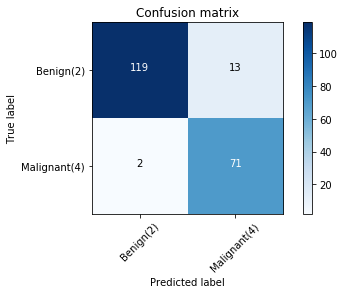

In [64]:
cnf_matrix = confusion_matrix(y_test, y_pred_rbf, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred_rbf))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

              precision    recall  f1-score   support

           2       0.98      0.92      0.95       132
           4       0.88      0.96      0.92        73

   micro avg       0.94      0.94      0.94       205
   macro avg       0.93      0.94      0.93       205
weighted avg       0.94      0.94      0.94       205

confusion matrix without normalization
[[122  10]
 [  3  70]]


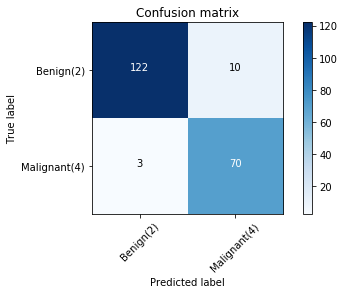

In [65]:
cnf_matrix = confusion_matrix(y_test, y_pred_linear, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred_linear))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

              precision    recall  f1-score   support

           2       0.98      0.90      0.94       132
           4       0.85      0.97      0.90        73

   micro avg       0.93      0.93      0.93       205
   macro avg       0.91      0.94      0.92       205
weighted avg       0.93      0.93      0.93       205

confusion matrix without normalization
[[69 63]
 [73  0]]


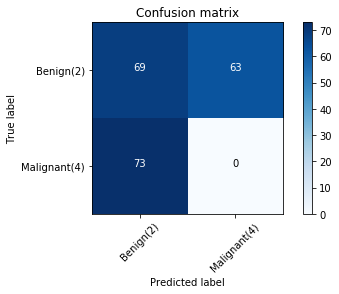

In [66]:
cnf_matrix = confusion_matrix(y_test, y_pred_sigmoid, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred_rbf))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [67]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_linear, average='weighted') 

0.9371724039968712

In [68]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_rbf, average='weighted') 

0.9278019060999252

In [69]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_sigmoid, average='weighted') 

0.32430122841374404

In [70]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_pred_linear)

0.9365853658536586

In [71]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_pred_rbf)

0.926829268292683

In [72]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_pred_sigmoid)

0.33658536585365856